In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle('ass2.pickle', compression='infer', storage_options=None)
data

{'train':        f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f33  f34  f35  f36  f37  \
 51905   1   0   0   0   0   0   2   1   2   2  ...    0    0    0    2    0   
 52612   0   0   0   0   0   0   2   1   0   0  ...    0    0    0    2    0   
 61699   2   1   2   1   1   0   2   2   0   0  ...    0    0    0    1    0   
 6291    0   0   0   0   0   0   0   0   0   0  ...    0    0    0    2    0   
 17484   0   0   0   0   0   0   1   1   2   0  ...    0    0    0    2    1   
 ...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
 9379    1   1   0   0   0   0   1   0   0   0  ...    0    0    0    2    0   
 40261   1   2   0   0   0   0   0   0   0   0  ...    0    0    0    1    2   
 23630   0   0   0   0   0   0   1   0   0   0  ...    0    0    0    2    2   
 7937    1   0   0   0   0   0   2   1   1   0  ...    0    0    0    0    0   
 63627   2   2   2   1   0   0   0   0   0   0  ...    0    0    0    1    0   
 
        f38  f39  f40  f41  t

In [4]:
type(data)

dict

In [5]:
train = data['train']
dev = data['dev']
test = data['test']

Data Analysis

In [6]:
df = pd.concat([train, dev, test]).drop(columns=['target']) 
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}\n")

# each feature's unique values
print("Features' values:")
vals={}
for column in df.columns:
    vals[column] = df[column].unique()
for column, values in vals.items():
    print(f"{column}': {values}")

print("\nFeatures' STD:")
print(df.std())
print("\nFeatures' Variance:")
print(df.var())

Number of samples: 67557
Number of features: 42

Features' values:
f0': [1 0 2]
f1': [0 1 2]
f2': [0 2 1]
f3': [0 1 2]
f4': [0 1 2]
f5': [0 1 2]
f6': [2 0 1]
f7': [1 2 0]
f8': [2 0 1]
f9': [2 0 1]
f10': [1 0 2]
f11': [0 1 2]
f12': [0 1 2]
f13': [0 2 1]
f14': [0 2 1]
f15': [0 1 2]
f16': [0 2 1]
f17': [0 1 2]
f18': [1 0 2]
f19': [0 2 1]
f20': [0 1 2]
f21': [0 2 1]
f22': [0 1 2]
f23': [0 1 2]
f24': [0 1 2]
f25': [0 2 1]
f26': [0 2 1]
f27': [0 2 1]
f28': [0 1 2]
f29': [0 1 2]
f30': [0 1 2]
f31': [0 2 1]
f32': [0 1 2]
f33': [0 1 2]
f34': [0 2 1]
f35': [0 1 2]
f36': [2 1 0]
f37': [0 1 2]
f38': [0 2 1]
f39': [0 1 2]
f40': [0 2 1]
f41': [0 1 2]

Features' STD:
f0     0.835185
f1     0.779892
f2     0.610544
f3     0.444534
f4     0.286081
f5     0.119787
f6     0.837729
f7     0.794397
f8     0.627658
f9     0.458003
f10    0.287643
f11    0.119666
f12    0.813191
f13    0.808470
f14    0.650354
f15    0.472953
f16    0.289046
f17    0.119544
f18    0.836165
f19    0.744508
f20    0.556329
f21

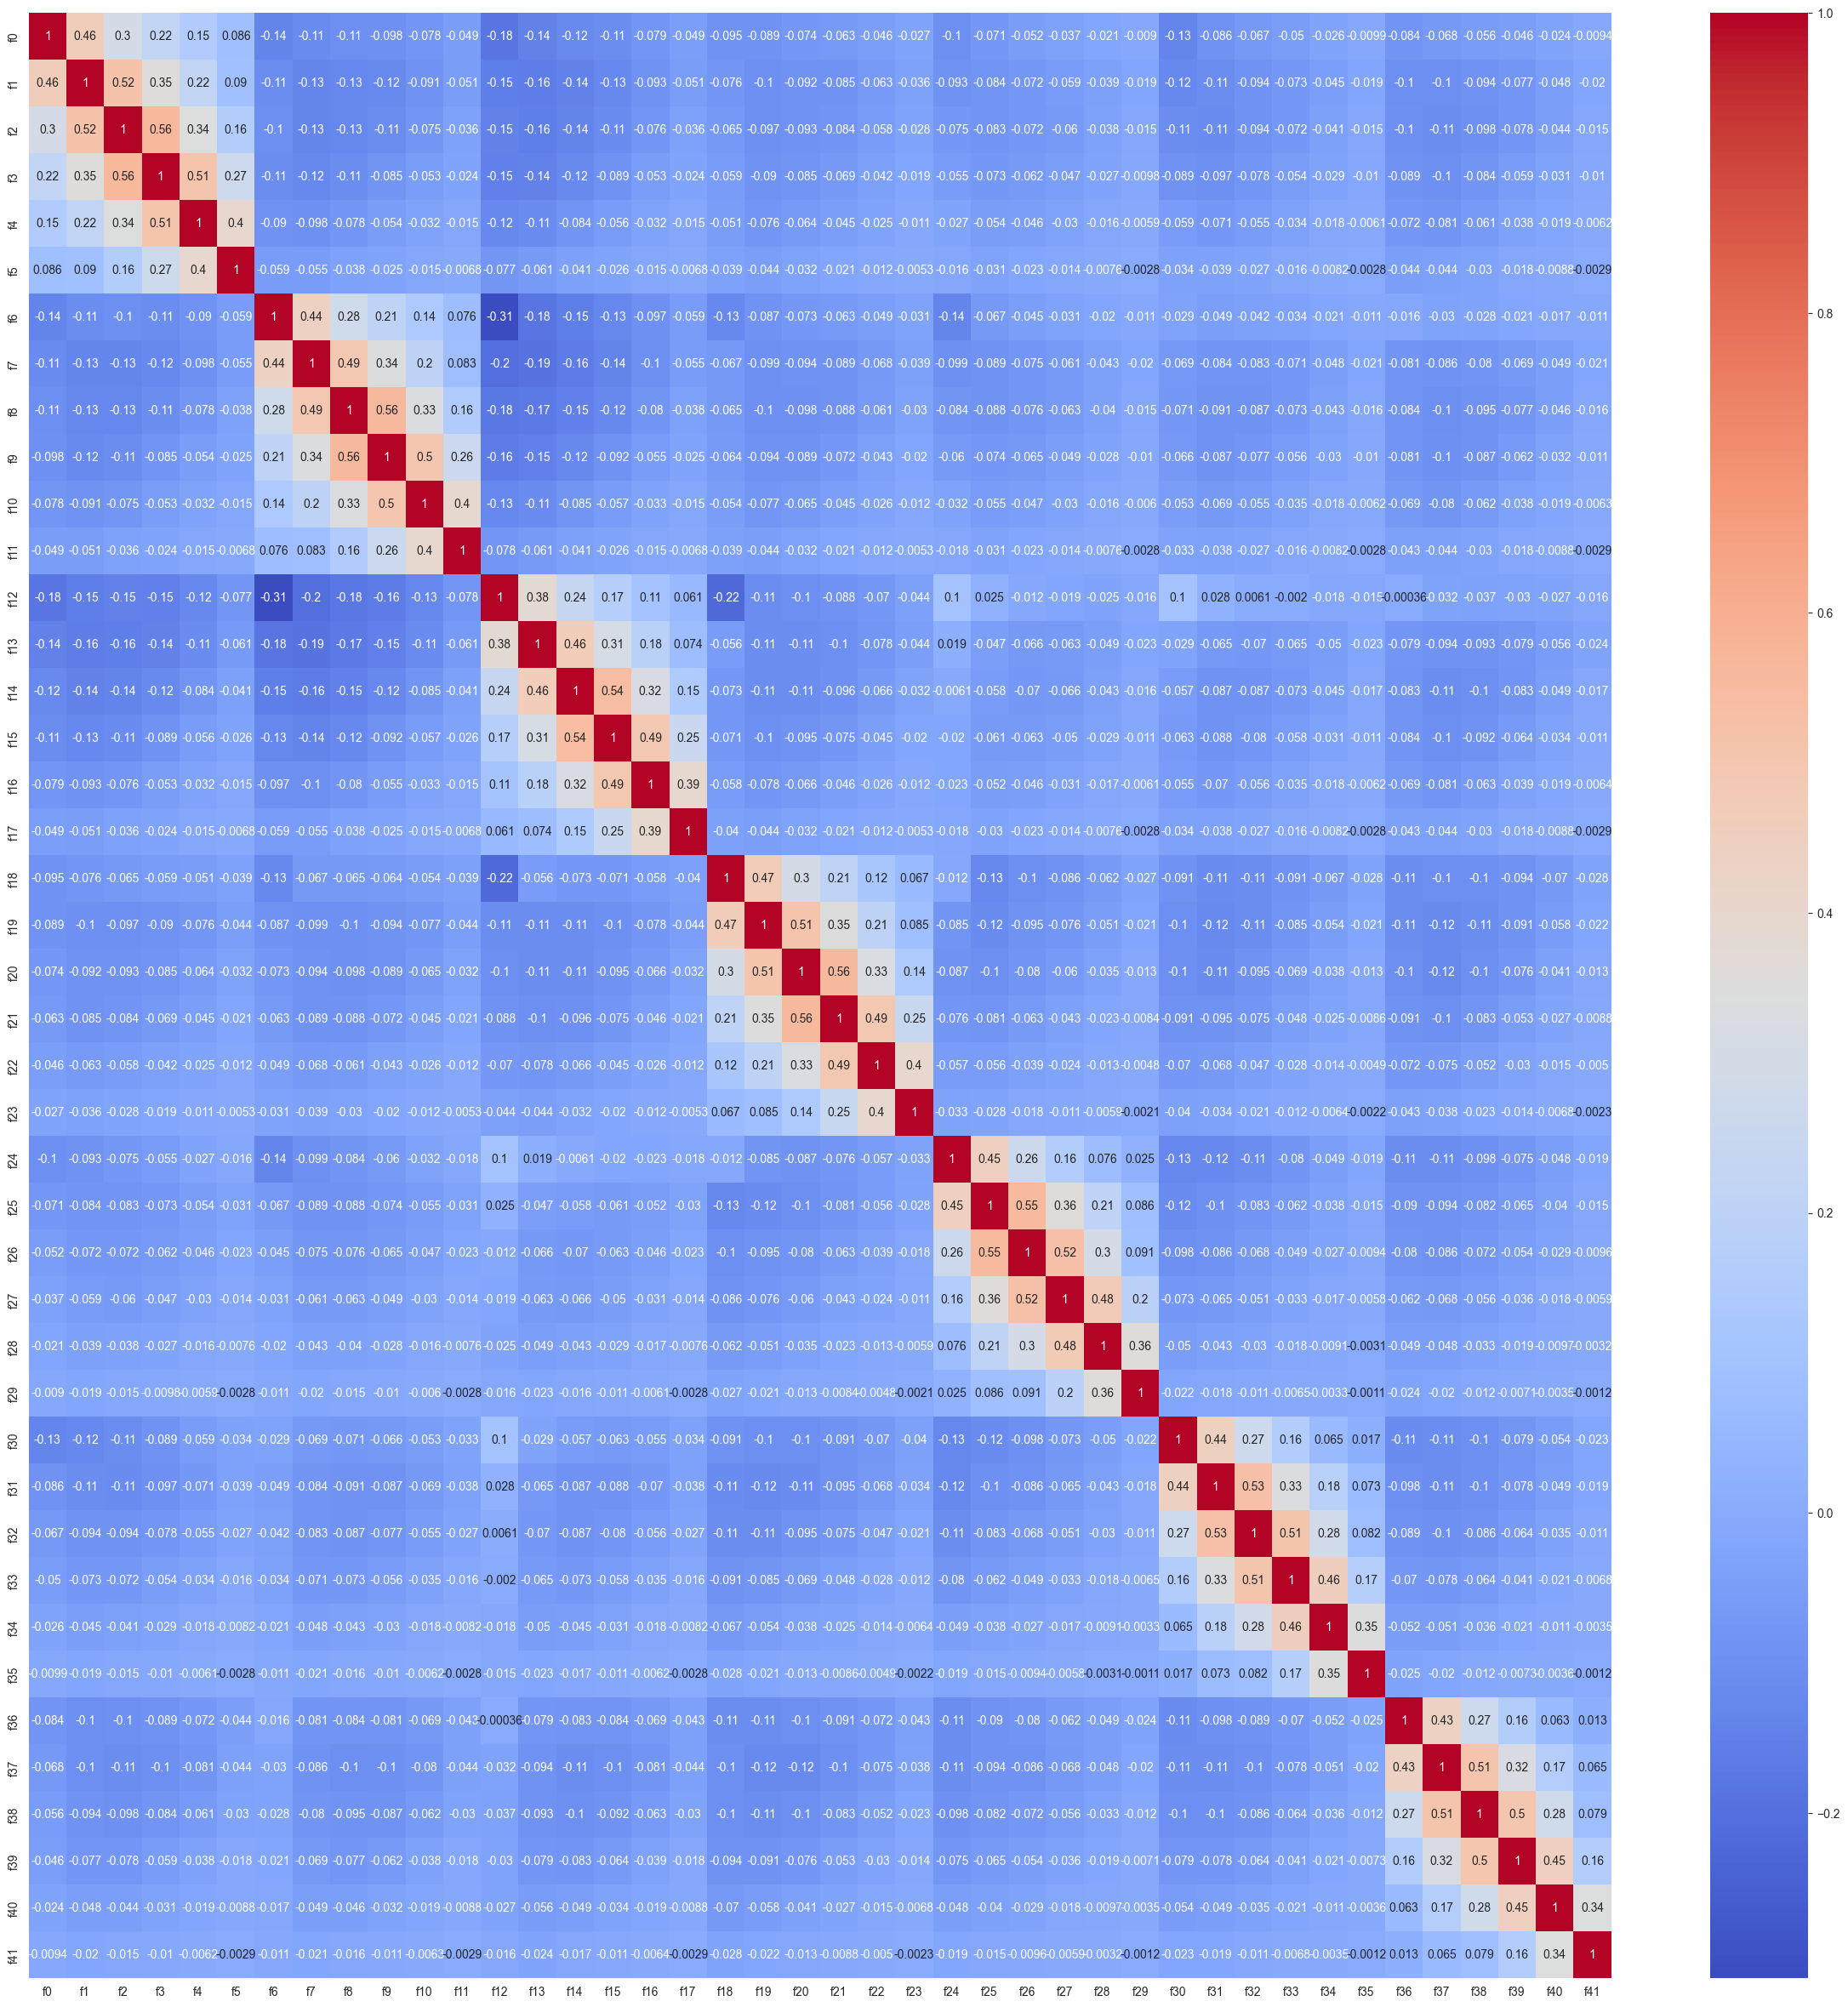

In [7]:
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Split the data to X and Y

In [8]:
x_train = train.drop(columns=['target'])
y_train = train['target']

x_dev = dev.drop(columns=['target'])
y_dev = dev['target']

x_test = test.drop(columns=['target'])
y_test = test['target']

In [14]:
models = [
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }),
    ('XGBoost', XGBClassifier(objective='multi:softprob'), {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],}),
    ('Random Forest', RandomForestClassifier(), {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],}),
    ('AdaBoost', AdaBoostClassifier(), {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
    }),
    ('Neural Network', MLPClassifier(), {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'alpha': [0.0001, 0.001, 0.01],}),
          ]

In [ ]:
results = []
for model_name, model, param_grid in models:
  grid_search = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc_ovr',n_jobs=-1 ,cv=3, verbose=1)
  grid_search.fit(x_train, y_train)

  # Print the best parameters and best score for each model
  results.append((model_name, grid_search.best_score_, grid_search.best_params_, grid_search.best_estimator_))
  print(f"Best parameters for {model_name}: {grid_search.best_params_}")
  print(f"Best ROC AUC score for {model_name}: {grid_search.best_score_}")
  print()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
